In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.6.2


In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
image_size=[224,224]

In [6]:
train_path="/Users/chauhanabhishek/Downloads/Dataset/Train"
test_path="/Users/chauhanabhishek/Downloads/Dataset/Test"

In [7]:
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [8]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layer in vgg.layers:
    layer.trainable =False

In [10]:
folders= glob("/Users/chauhanabhishek/Downloads/Dataset/Train/*")

In [11]:
folders

['/Users/chauhanabhishek/Downloads/Dataset/Train/Parasite',
 '/Users/chauhanabhishek/Downloads/Dataset/Train/Uninfected']

In [12]:
x=Flatten()(vgg.output)

In [13]:
prediction=Dense(len(folders),activation="softmax")(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
from tensorflow.keras.layers import MaxPooling2D,Conv2D


In [16]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory('/Users/chauhanabhishek/Downloads/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [20]:
training_set

In [21]:
test_set = test_datagen.flow_from_directory('/Users/chauhanabhishek/Downloads/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 134 images belonging to 2 classes.


In [22]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-11-26 11:31:43.695531: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
13/13 [==============================] - 38s 3s/step - loss: 1.6496 - accuracy: 0.5216 - val_loss: 0.6521 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 35s 3s/step - loss: 0.6638 - accuracy: 0.5962 - val_loss: 0.7381 - val_accuracy: 0.4328
Epoch 3/50
13/13 [==============================] - 31s 2s/step - loss: 0.5439 - accuracy: 0.7188 - val_loss: 1.1412 - val_accuracy: 0.3507
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.5318 - accuracy: 0.7043 - val_loss: 0.7946 - val_accuracy: 0.3955
Epoch 5/50
13/13 [==============================] - 21s 2s/step - loss: 0.4772 - accuracy: 0.7524 - val_loss: 0.8482 - val_accuracy: 0.3731
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.4399 - accuracy: 0.7596 - val_loss: 0.8720 - val_accuracy: 0.3731
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 0.4176 - accuracy: 0.7812 - val_loss: 0.9034 - val_accuracy: 0.3731
Epoch 8/50
13/13 [==

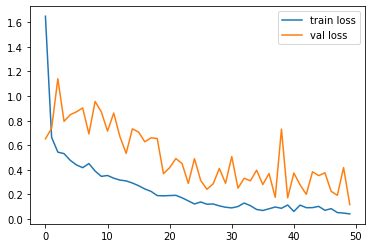

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


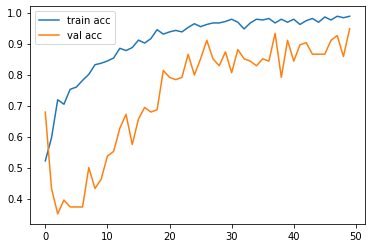

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [25]:


from keras.models import load_model

model.save('model_vgg19.h5')


In [26]:
y_pred=model.predict(test_set)

In [27]:
y_pred

array([[1.03637256e-01, 8.96362722e-01],
       [4.62215841e-01, 5.37784159e-01],
       [9.78439271e-01, 2.15607844e-02],
       [1.85589120e-02, 9.81441140e-01],
       [1.00000000e+00, 1.34753968e-08],
       [1.00000000e+00, 2.12051266e-18],
       [9.35247447e-03, 9.90647495e-01],
       [3.84980679e-01, 6.15019321e-01],
       [2.66296435e-02, 9.73370373e-01],
       [9.99938488e-01, 6.15068493e-05],
       [5.39812334e-02, 9.46018815e-01],
       [9.99931574e-01, 6.84565457e-05],
       [1.69738933e-01, 8.30261052e-01],
       [9.99997616e-01, 2.39395786e-06],
       [4.41757916e-03, 9.95582402e-01],
       [9.99829412e-01, 1.70612300e-04],
       [9.99993443e-01, 6.54288942e-06],
       [9.99982476e-01, 1.75568239e-05],
       [3.12797390e-02, 9.68720257e-01],
       [9.24939156e-01, 7.50608444e-02],
       [9.99999881e-01, 8.28898052e-08],
       [9.87374902e-01, 1.26250740e-02],
       [3.00584380e-02, 9.69941616e-01],
       [9.99779761e-01, 2.20293397e-04],
       [1.000000

In [28]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [29]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_vgg19.h5')

In [31]:
img=image.load_img("/Users/chauhanabhishek/Downloads/Dataset/Test/Uninfected/2.png",target_size=(224,224))

In [42]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data),axis=1)

In [38]:
if(a==1):
    print("Uninfected")
else:
    print("infected")

Uninfected
